# Eksempel
---

Notebook med eksempel av appen.

In [7]:
from web.RouterPlacer import *
# img = plt.imread("floorplans_processed/00_2.png", "gray")
img = plt.imread("floorplans_processed/01.png", "gray")

La oss først se hvordan bildet ser ut:

(<matplotlib.image.AxesImage at 0x1cfa99ae808>, (1000, 1000, 4))

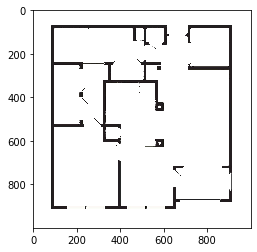

In [8]:
plt.imshow(img), img.shape

Nå lager vi en instanse av routerPlacer, og henter all nødvendig informasjon.

In [9]:
routerPlacer = RouterPlacer(img)
routerPlacer.get_optimal_solution()

Optimal coordinates not found. Getting new results
LU-decomposition not found. Getting new.
Setting up matrix.
Setting up matrix took 12.53s
Fetching LU-decomposition.
LU-decomposition too 2539.73s
Got gauss-distributed points. Now checking 361 points
Getting solutions took 1918.04s
Optimal position: (503, 503)


In [10]:
routerPlacer.img.shape

(1008, 1008)

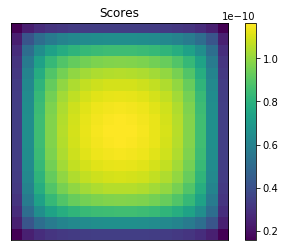

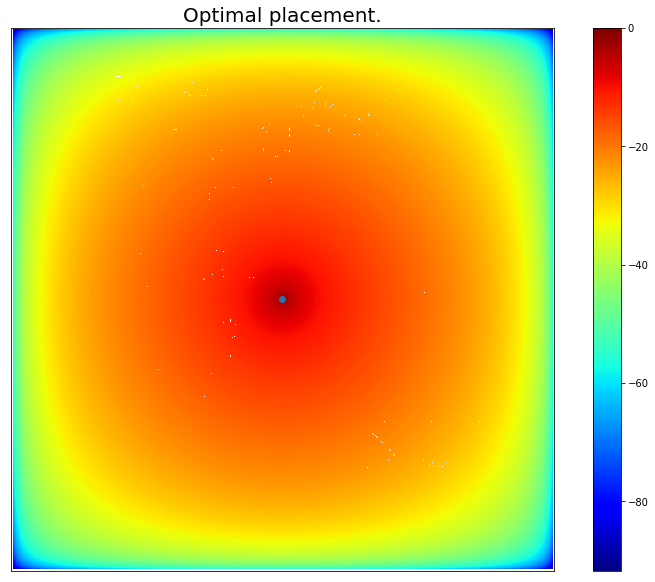

In [11]:
routerPlacer.score_plot()
routerPlacer.solution_plot()


***

## Sammenlikning med plassering i midten

In [12]:
from wifi_matrix import solve_single_system, plot_single_solution
from score import step_score
from find_optimal import convolve_solution

In [13]:
x0, y0 = routerPlacer.img.shape
x0 =(x0-1)//2
y0 = (y0-1)//2

In [14]:
middle_solution = solve_single_system(routerPlacer.lu, x0, y0, routerPlacer.img.shape)
middle_solution = convolve_solution(middle_solution, routerPlacer.img.shape)
middle_score = step_score(middle_solution, routerPlacer.img)

In [15]:
middle_score, routerPlacer.optimal_score

(1.1639243609012194e-10, 1.1639243609012194e-10)

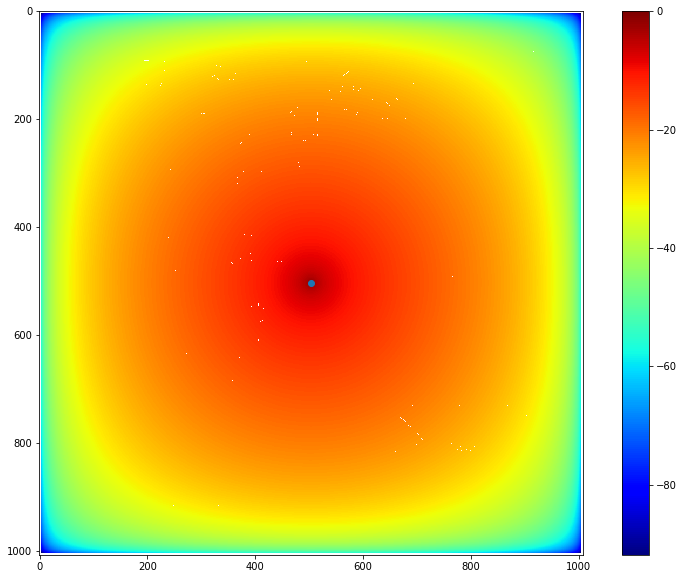

In [16]:
plot_single_solution(middle_solution, x0, y0, routerPlacer.img)

In [17]:
del routerPlacer